<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [13]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
# задаем параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [116]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''
               SELECT COUNT(id)
               FROM vacancies
'''

In [5]:
# результат запроса
df_cnt_vac = pd.read_sql_query(query_3_1, connection)
df_cnt_vac.iloc[0]

count    49197
Name: 0, dtype: int64

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''
            select
                count(id)
            from employers
            '''

In [7]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
df_3_2.iloc[0]

count    23501
Name: 0, dtype: int64

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''
            select
                count(id)
            from areas
            '''

In [9]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
df_3_3.iloc[0]

count    1362
Name: 0, dtype: int64

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''
            select
                count(id)
            from industries
            '''

In [11]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
df_3_4.iloc[0]

count    294
Name: 0, dtype: int64

***

## Выводы по предварительному анализу данных

Наша БД состоит из 5 таблиц:
    - areas(1362 региона)
    - industies(294 сферы)
    - vacancies(49197 вакансий)
    - employers(23501 работадателя)
    - employers_industries(таблица для связи работадателей и их сфер деятельности)

- На рынке имеется примерно в 2 раза больше вакансий, чем количество компаний.
- В среднем 38 вакансий на регион и около 180 на сферу деятельности.
- Похожже что наша база полностью охватывает все регионы и сферы.
- Имеется достасточное большое число работодателей.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1 = f''' 
            select
                a.name area,
                count(v.id) cnt_vacancies
            from areas a
            left join vacancies v on a.id = v.area_id
            group by 1
            order by 2 desc
            '''

In [13]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

,area,cnt_vacancies
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Багаевская,0
1358,Пролетарск,0
1359,Седельниково,0
1360,Инской,0


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
query_4_2 = f'''
            select
                count(id)
            from vacancies
            where salary_from is not null 
                or salary_to is not null
            '''

In [15]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query_4_3 = f'''
            select
                round(avg(salary_from)) avg_sal_from,
                round(avg(salary_to)) avg_sal_to
            from vacancies'''

In [17]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

,avg_sal_from,avg_sal_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query_4_4 = f'''
            select
                schedule,
                employment,
                count(id)
            from vacancies
            group by employment, schedule
            order by 3 desc'''

In [19]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса
query_4_5 = f'''
            select
                experience,
                count(id)
            from vacancies
            group by experience
            order by 2'''

In [21]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

## Выводы по детальному анализу вакансий
- Как и ожидалось большое количество вакансий размещено в крупных регионах (Москва, Санкт-Петербург, Минск, Новосибирск, Алматы)
- у половины вакансий заполнено хотя бы одно поле с заработной платой
- средние значения для нижней и верхней границы зарплатной вилки составляют: 71065 и 110537
- наибольшую долю занимают вакансии с полным рабочим днём.
- популярное сочетание типа рабочего графика (schedule) и типа трудоустройства (employment):
  - Полный день	Полная занятость
  - Удаленная работа Полня занятость
- также заметим что требуется мало специалистов, но большое количество juniors.

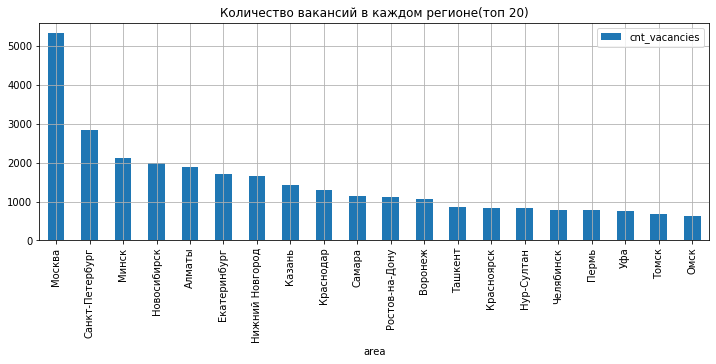

In [83]:
df_4_1.head(20).plot(kind='bar', x='area', figsize=(12,4), grid=True, title='Количество вакансий в каждом регионе(топ 20)')

Text(0.5, 1.0, 'Распределение требуемого опыта работы по вакансиям')

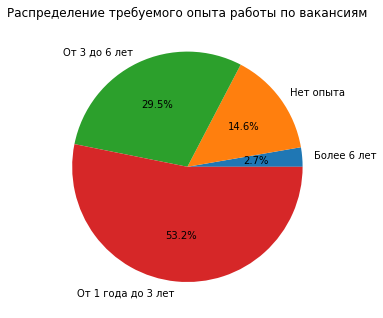

In [79]:
fig = plt.figure(figsize=(4,4))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    df_4_5['count'],
    labels=df_4_5['experience'],
    autopct='%.1f%%'
    
)
axes.set_title('Распределение требуемого опыта работы по вакансиям')

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [24]:
# текст запроса
query_5_1 = f'''
            select
                e.name employer,
                count(v.id) cnt_vacancies
            from employers e
            join vacancies v on e.id = v.employer_id
            group by e.id
            order by 2 desc'''

In [25]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1.iloc[[0,4]]

,employer,cnt_vacancies
0,Яндекс,1933
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [26]:
# текст запроса
query_5_2 = f'''
            select
                a.name,
                count(e.id) cnt_employer,
                count(v.id) cnt_vacancies
            from areas a
            left join employers e on a.id = e.area
            left join vacancies v on a.id = v.area_id
            where v.id is null
            group by 1
            order by 2 desc
            limit 1'''

In [27]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

,name,cnt_employer,cnt_vacancies
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [28]:
# текст запроса
query_5_3 = f'''
            select
                e.name employer,
                count(distinct v.area_id)
            from employers e
            left join vacancies v on e.id = v.employer_id
            group by e.id
            order by 2 desc'''

In [29]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

,employer,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23496,Но Смокинг,0
23497,МАСТЕРСКАЯ CREED,0
23498,Dzing Finance,0
23499,КОРС,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [30]:
# текст запроса
query_5_4 = f'''
            select
                count(distinct e.id) employer_without_industry
            from employers e
            left join employers_industries ei on e.id = ei.employer_id
            where ei.industry_id is null
            '''

In [31]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

,employer_without_industry
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [32]:
# текст запроса
o = 2
l = 1
query_5_5 = f'''
            select
                e.name employer,
                count(ei.industry_id) cnt_industry
            from employers e
            join employers_industries ei on e.id = ei.employer_id
            group by 1
            having count(ei.industry_id)=4
            order by 1
            offset {o}
            limit {l}'''

In [33]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

,employer,cnt_industry
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [34]:
# текст запроса
query_5_6 = f'''
            select
                i.name industry,
                count(ei.employer_id)
            from employers_industries ei
            join industries i on ei.industry_id = i.id
            where i.name = 'Разработка программного обеспечения'
            group by 1'''

In [35]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

,industry,count
0,Разработка программного обеспечения,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [36]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
table_city = pd.read_html(url)
df_city = table_city[1]
city_list = df_city['Город'].to_list()
city_list[-3] = city_list[-3][:-3]
cities = tuple(city_list)
cities

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [37]:
# текст запроса
query_5_7 = f'''
            select
                a.name area,
                count(v.id) cnt_vacancies
            from vacancies v
            join employers e on v.employer_id = e.id
            join areas a on v.area_id = a.id
            where e.name = 'Яндекс' and a.name in {cities}
            group by e.name, a.name

            union

            select
                'total',
                count(v.id)
            from vacancies v
            join employers e on v.employer_id = e.id
            join areas a on v.area_id = a.id
            where e.name = 'Яндекс' and a.name in {cities}
            group by e.name

            order by 2'''

In [38]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
df_5_7

,area,cnt_vacancies
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


In [106]:
# текст запроса
query_5_6_2 = f'''
            select
                i.name industry,
                count(ei.employer_id)
            from employers_industries ei
            join industries i on ei.industry_id = i.id
            group by 1
            order by 2 desc
            limit 15'''

In [107]:
# дополнительное исследование. Количество вакансий в каждой сфере деятельности.
df_5_6_2 = pd.read_sql_query(query_5_6_2, connection)
df_5_6_2

,industry,count
0,Разработка программного обеспечения,3553
1,"Системная интеграция, автоматизации технологи...",2993
2,"Интернет-компания (поисковики, платежные систе...",1675
3,"Маркетинговые, рекламные, BTL, дизайнерские, E...",798
4,Консалтинговые услуги,662
5,Кадровые агентства,389
6,"Электронно-вычислительная, оптическая, контрол...",374
7,Розничная сеть (продуктовая),368
8,Интернет-магазин,351
9,"Архитектура, проектирование",346


***

## Выводы по анализу работодателей

- около 30%  работодателей не указали свою сферу деятельности
- наибольшее коичесво предложений исходит от компании "Яндекс". Она опережаетследующую за ней почти в 4 раза.
- Лидирущие сферы деятельности:
    - разработкой программного обеспечения(~12%)
    - Системная интеграция, автоматизации технологии и бизнес процессов предприятия, ИТ-консалтинг(~10%)
    - Интернет-компания(~6%)
- лидируюущие позиции по всем направлениям занимает компания "Яндекс"

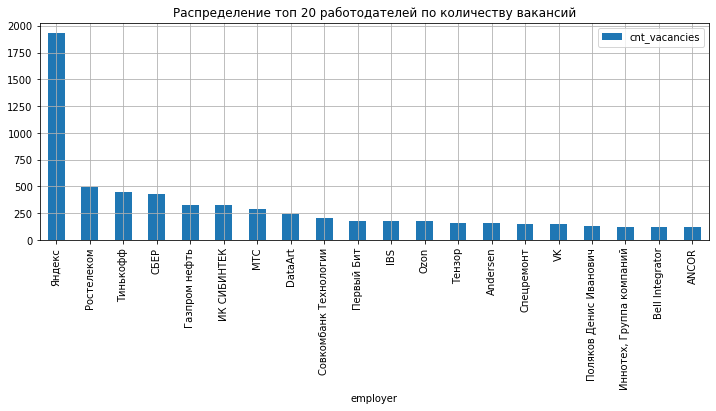

In [82]:
df_5_1.head(20).plot(kind='bar', x='employer', figsize=(12,4), grid=True, title='Распределение топ 20 работодателей по количеству вакансий')

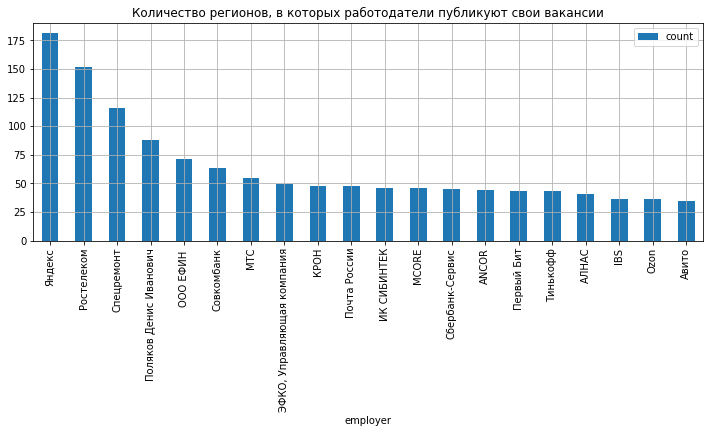

In [84]:
df_5_3.head(20).plot(kind='bar', x='industry', figsize=(12,4), grid=True, title='Количество регионов, в которых работодатели публикуют свои вакансии')

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [39]:
# текст запроса
vac_data = ('data', 'данн')
query_6_1 = f'''
            select
                count(name)
            from vacancies
            where lower(name) like '%{vac_data[0]}%' or lower(name) like '%{vac_data[1]}%'
            '''

In [40]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [41]:
# текст запроса
ds = ('data scientist', 'data science', 'исследователь данных', 'ML', 'machine learning', 'машинн%обучен%')
query_6_2 = f'''
            select
                count(id) cnt_jun_ds
            from vacancies
            where (lower(name) like '%{ds[0]}%'
                or lower(name) like '%{ds[1]}%'
                or lower(name) like '%{ds[2]}%'
                or (name like '%{ds[3]}%' and name not like '%HT{ds[3]}%')
                or lower(name) like '%{ds[4]}%'
                or lower(name) like '%{ds[5]}%')
                and
                (lower(name) like '%junior%'
                or experience = 'Нет опыта'
                or employment = 'Стажировка')'''

In [42]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2

,cnt_jun_ds
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [43]:
# текст запроса
query_6_3 = f'''
            select
                count(id) cnt_ds
            from vacancies
            where (lower(name) like '%{ds[0]}%'
                or lower(name) like '%{ds[1]}%'
                or lower(name) like '%{ds[2]}%'
                or (name like '%{ds[3]}%' and name not like '%HT{ds[3]}%')
                or lower(name) like '%{ds[4]}%'
                or lower(name) like '%{ds[5]}%')
                and
                (key_skills like '%SQL%'
                or lower(key_skills) like '%postgres%')'''

In [44]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3

,cnt_ds
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [45]:
# текст запроса
query_6_4 = f'''
            select
                count(id) cnt_ds_python
            from vacancies
            where (lower(name) like '%{ds[0]}%'
                or lower(name) like '%{ds[1]}%'
                or lower(name) like '%{ds[2]}%'
                or (name like '%{ds[3]}%' and name not like '%HT{ds[3]}%')
                or lower(name) like '%{ds[4]}%'
                or lower(name) like '%{ds[5]}%')
                and
                (key_skills like '%Python%')'''

In [46]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

,cnt_ds_python
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [47]:
# текст запроса
query_6_5 = f'''
            select
                round(avg(1+length(key_skills) - length(replace(key_skills, chr(9), ''))),2)
            from vacancies
            where (lower(name) like '%{ds[0]}%'
                or lower(name) like '%{ds[1]}%'
                or lower(name) like '%{ds[2]}%'
                or (name like '%{ds[3]}%' and name not like '%HT{ds[3]}%')
                or lower(name) like '%{ds[4]}%'
                or lower(name) like '%{ds[5]}%')'''

In [48]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [49]:
# текст запроса
query_6_6 = f'''
            select
                experience,
                avg((salary_from + salary_to)/2) avg_salary
            from vacancies
            where (lower(name) like '%{ds[0]}%'
                or lower(name) like '%{ds[1]}%'
                or lower(name) like '%{ds[2]}%'
                or (name like '%{ds[3]}%' and name not like '%HT{ds[3]}%')
                or lower(name) like '%{ds[4]}%'
                or lower(name) like '%{ds[5]}%')
                and (salary_from is not null 
                and salary_to is not null)
            group by experience'''


In [50]:
query_6_6 = f'''
            select
                experience,
                round(avg((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from))/2)) avg_salary
            from vacancies
            where (lower(name) like '%{ds[0]}%'
                or lower(name) like '%{ds[1]}%'
                or lower(name) like '%{ds[2]}%'
                or (name like '%{ds[3]}%' and name not like '%HT{ds[3]}%')
                or lower(name) like '%{ds[4]}%'
                or lower(name) like '%{ds[5]}%')
                and (salary_from is not null 
                or salary_to is not null)
            group by experience'''

In [51]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6

,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


Дополнительно узнаем сколько всего вакансий по дата-сайенс

In [117]:
# текст запроса
query_6_7 = f'''
            select
                count(id) cnt_ds_python
            from vacancies
            where (lower(name) like '%{ds[0]}%'
                or lower(name) like '%{ds[1]}%'
                or lower(name) like '%{ds[2]}%'
                or (name like '%{ds[3]}%' and name not like '%HT{ds[3]}%')
                or lower(name) like '%{ds[4]}%'
                or lower(name) like '%{ds[5]}%')
                '''

In [118]:
# результат запроса
df_6_7 = pd.read_sql_query(query_6_7, connection)
df_6_7

,cnt_ds_python
0,480


***

# Выводы по предметному анализу

- вакансий, имеющих отношение к данным(1771) около 35%
- вакансий по дата-сайенс(480) около 27% из имеющих отношение к данным
    - для начинающих дата-саентистов(51) около 10% из имеющих отношение к дата-сайенс
    - ключевой навык владения python в подавляющем большинстве (73%)
    - ключевой навык SQL или postgres  42% 
    - среднее количесво навыков необходимых дата-саентисту 6.4
    - диапозон зарплат для дата-саентиста с опытом работы до 6 лет составляет 75-243 т.р.


# Общий вывод по проекту

# подведем итог исследования

Итак, на рынок труда выложено много вакансий в области ИТ и есть большой выбор работодателей, регионов  и сфер деятельности.
Приорететными регионами, конечно являются города миллионники, в особенности Москва(здесь не будет проблем с выбором для работника с любым оптом работы)
Представлены различные графики работ, в основном надо ориентироваться на полную занятость, работая на месте, либо удалённо.
Разброс средней з/п в районе 150% с достаточно высоким нижним порогом, но надо учитывать, что только половина компаний указала хотя одну изграниц. Следовательно надо зарание обочначить для себя желаемую з/п и проводить переговоры.
Отрасль молодая и мы видим большое количество предложений для начинающих специалистов.
Подавляющая часть предложений исходит от российских работодателей с такими сферами деятельности:
    - разработкой программного обеспечения(~12%)
    - Системная интеграция, автоматизации технологии и бизнес процессов предприятия, ИТ-консалтинг(~10%)
    - Интернет-компания(~6%)

Относительно интересующей нас специальности дата-сайенс:
- Количество предложений по дата-сайенс занимает большую долю из вакансий относящихся к данным.
- У специалистов ключевым навыком является владение python и умение работать с базами данных,
  также необходимо иметь ещё около 4 софт скиллов.
- Для начинающих специалистов имеется не слишком большое предложение,
  но начальная з/п на высоком уровне с хорошими перспективами. 

# что можно ещё сделать
 - исследовать:
     - какую часть рынка занимают вакансии по ИТ
     - распределение по регионам вакансий для мидл специалистов
     - уровень зарплат относительно специальностей не в ИТ сфере
     - архив вакансий и динамику их изменения.

In [1]:
pip freeze > requirements.txt.

Note: you may need to restart the kernel to use updated packages.
